In [1]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
pip install mnist keras tensorflow

     |████████████████████████████████| 593kB 2.7MB/s eta 0:00:01
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [4]:
print (train_images.shape)
print (test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
type(train_images[0])

numpy.ndarray

In [14]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

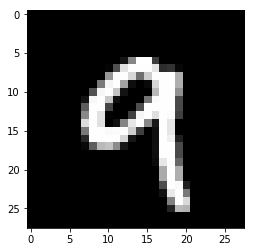

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[110]
first_image = np.array(first_image, dtype = 'float')
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()


In [7]:
#Normalise the images
train_images = (train_images/225) - 0.5 
test_images = (test_images/225) - 0.5
 #By Normalising we brought it down to a range of -0.5 to +0.5 instead of 0 -2 55
    

In [8]:
train_images[110]

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5   

In [9]:
#Flatten the data
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [11]:
#Build the model
model = Sequential([
    Dense(64, activation='relu',input_shape=(784,)), #first hidden layer is densly connected with all other neurons and 
    Dense(64, activation='relu'), #2nd hidden layer
    Dense(10, activation='softmax'), #3rd hidden layer - converts set of numeric values to probability ( e power 1 and all that)
])

In [12]:
#Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # reduces the error in the last hidden stage (probability) as in so if 4 neurons fired up, eg. 1,2,3 and 5, if the correct answer is 5, crossentropy will give more prob to 5. The backpropogation will reduce the weights which lead to 1,2 and 3.
    metrics=['accuracy'],
)

In [13]:
#Train the model
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=5, #trains the complete 60k images with 1875 iterations is one epoch. so we're doing it 5 times.
    batch_size=32, #so overall 1875 mini batch of images are sent for every iteration. 60k/32 = 1875
)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3290 - accuracy: 0.9001
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.1665 - accuracy: 0.9504
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1276 - accuracy: 0.9607
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1073 - accuracy: 0.9667
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0931 - accuracy: 0.9706


In [14]:
#Evaluate the model
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

10000/10000 [==============================] - 0s 25us/step


[0.10315865341220051, 0.968999981880188]

In [15]:
#Save the model to disk
model.save_weights('model.h5')
#Load model from the disk later using
#model.load_weights


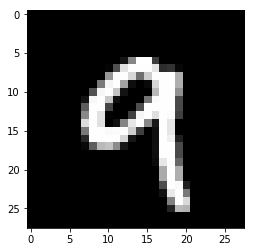

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_images[110]
first_image = np.array(first_image, dtype = 'float')
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [18]:
np.argmax(model.predict(test_images[110].reshape(-1,784)))
#print(pred.argmax())

8

In [22]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]
